In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing

In [2]:
dafr = pd.read_csv('Hotel Reservations.csv')
dafr.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
dafr.shape

(36275, 19)

In [4]:
dafr.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
for c_l in list(dafr.select_dtypes(include=['object']).columns):
    dafr[c_l] = LabelEncoder().fit_transform(dafr[c_l])
    
dafr['arrival_year'] = LabelEncoder().fit_transform(dafr['arrival_year'])

scaler_dt = MinMaxScaler()
X_scaled = scaler_dt.fit_transform(dafr[['lead_time', 'arrival_month', 'arrival_date']])
dafr[['lead_time', 'arrival_month', 'arrival_date']] = X_scaled

dafr.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,0,0,0,0.505643,0,0.818182,0.033333,3,0,0,0,65.00,0,1
1,1,2,0,2,3,3,0,0,0.011287,1,0.909091,0.166667,4,0,0,0,106.68,1,1
2,2,1,0,2,1,0,0,0,0.002257,1,0.090909,0.900000,4,0,0,0,60.00,0,0
3,3,2,0,0,2,0,0,0,0.476298,1,0.363636,0.633333,4,0,0,0,100.00,0,0
4,4,2,0,1,1,3,0,0,0.108352,1,0.272727,0.333333,4,0,0,0,94.50,0,0


In [8]:
X = dafr.drop(['Booking_ID', 'avg_price_per_room', 'room_type_reserved'], axis = 1)
y = dafr['room_type_reserved']

In [9]:
set(y)

{0, 1, 2, 3, 4, 5, 6}

In [10]:
print(type(X), type(y))
print(X.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(36275, 16) (36275,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [12]:
print(type(X), type(y))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(29020, 16) (29020,)


In [14]:
model = DecisionTreeClassifier(criterion='gini')

In [15]:
y_train_tr = LabelEncoder().fit_transform(y_train)
model.fit(X_train, y_train_tr)

DecisionTreeClassifier()

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_test_tr = LabelEncoder().fit_transform(y_test)
print(classification_report(y_test_tr, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      5574
           1       0.52      0.56      0.54       145
           2       0.33      0.50      0.40         2
           3       0.64      0.65      0.64      1251
           4       0.29      0.37      0.32        52
           5       0.68      0.72      0.70       193
           6       0.21      0.18      0.20        38

    accuracy                           0.84      7255
   macro avg       0.51      0.55      0.53      7255
weighted avg       0.84      0.84      0.84      7255



In [18]:
print(confusion_matrix(y_test_tr, y_pred))

[[5055   47    1  410   31   23    7]
 [  37   81    0   14    0   11    2]
 [   1    0    1    0    0    0    0]
 [ 393   19    1  807   14   11    6]
 [  22    1    0    5   19    4    1]
 [  24    7    0   12    1  139   10]
 [   7    0    0    8    1   15    7]]


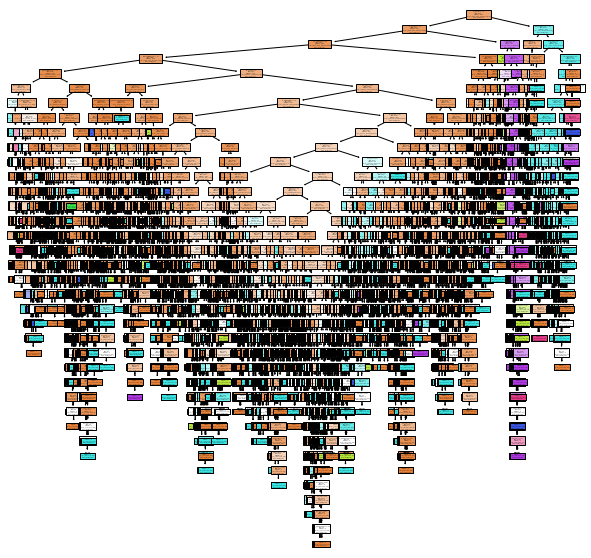

In [21]:
plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                                  'type_of_meal_plan', 'required_car_parking_space', 'lead_time', 'arrival_year',
                                  'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest',
                                  'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                                  'no_of_special_requests', 'booking_status'], 
          class_names = ['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6',
                         'Room_Type 7'], filled = True)
plt.show()